# **Business Case: Netflix - Data Exploration and Visualisation**

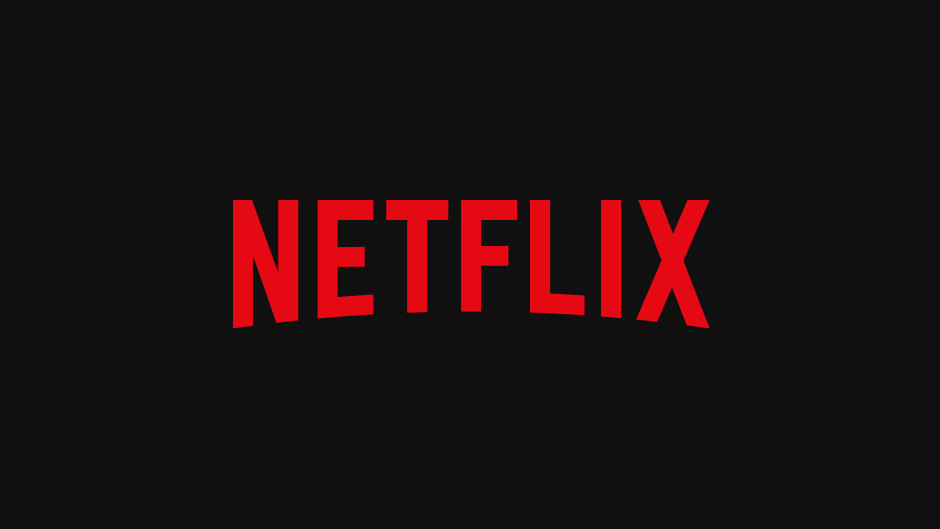

## **Netflix**
 Netflix is an American subscription video on-demand over-the-top streaming service. The service primarily distributes original and acquired films and television shows from various genres, and is available internationally in multiple languages.
 It is one of the most popular media and video streaming platforms. It has over 10000 movies or tv shows available on its platform, as of mid-2021, and has over 222M Subscribers globally.

# **PROBLEM STATEMENT :**

*   Analysing the available data and generate insights that could help Netflix in deciding :
  1.   which type of shows or movies to produce,
  2.   how to grow the business in different countries according to   regional viewing preferences,
  3.   predict the types of content likely to succeed in specific markets.



## **GOAL :**


*   Netflix can increase subscriptions, improve viewer satisfaction, and strengthen its position in the global entertainment market.


*   Customizing the selection of movies, TV shows, or other entertainment content to suit the preferences, cultures, and interests of audiences in different regions or countries.                                              

The goal is to ensure that the content resonates with viewers worldwide, thereby attracting a broader audience and increasing viewership globally.

# **IMPORTING DATASET AND LIBRARIES**

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg" -O netflix_title.csv   #DOWNLOADING DATASET FROM WEB


--2024-12-02 20:11:11--  https://drive.google.com/uc?export=download&id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg
Resolving drive.google.com (drive.google.com)... 108.177.125.139, 108.177.125.113, 108.177.125.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg&export=download [following]
--2024-12-02 20:11:11--  https://drive.usercontent.google.com/download?id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.174.132, 2404:6800:4008:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.174.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [application/octet-stream]
Saving to: ‘netflix_title.csv’

netflix_title.csv   100%[===================>]   3.24M 

In [ ]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('netflix_title.csv')

In [ ]:
 # A GLIMPSE OF THE NETFLIX DATASET

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **GENERAL OBSERVATIONS**

- Shape, Description, Attributes and Datatypes.

In [ ]:
# SHAPE OF THE DATASET - NO OF ROWS AND COLUMNS

df.shape

(8807, 12)

**ANALYSIS:**

The Netflix Dataset has 8807 rows and 12 columns.
  Rows represent different shows with unique Show IDs.
  Columns representing different attributes of a particular Show ID.

In [ ]:
# NAME OF COLUMNS AND THEIR DATATYPE

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**DESCRIPTION:**

  The  df.info() command gives insights about the presence of any null values at different data points and the respective change in datatypes of attributes due to those NULL values.
  
  It is evident that there are many NULL values which can cause anomaly in  data presentation for the business, so these NULL values need to be dealt with first.

In [ ]:
# DESCRIPTIVE STATISTICS SUMMARY OF THE GIVEN DATAFRAME

df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


# **HANDLING NULL VALUES**

In [ ]:
# CALCULATING NUMBER OF NULL VALUES IN ALL COLUMNS

print("-------------------------------------------")
print("No. of Null values in different columns :")
print("-------------------------------------------")

print(df.isnull().sum().sort_values(ascending=False),"\n")

print("-------------------------------------------")
print("Rate of Occurrence of Null values :")
print("-------------------------------------------")

null_rate=df.isnull().sum()/len(df)*100
print(null_rate.sort_values(ascending=False))

-------------------------------------------
No. of Null values in different columns :
-------------------------------------------
director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64 

-------------------------------------------
Rate of Occurrence of Null values :
-------------------------------------------
director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64


**NULL VALUES:**

The data clearly shows that the rate of occurence of NULL VALUES is high in some columns only.

To tackle the issue of interference of NULL values in our DATA ANALYSIS, we can preferably delete the datapoints where rate of occurrence of NULLs is less than 1% i.e. 3 Columns--> "rating", "duration", "date_added".

For datapoints where rate of occurrence of NULLs is more than 1%, we can preferably replace them with "NO DATA" to maintain the regularity.


In [ ]:
# DROPPING NULL VALUES
df = df[~df['rating'].isnull()]       # RATING COLUMN WITH 0.05% NULL VALUES
df = df[~df['duration'].isnull()]     # DURATION COLUMN WITH 0.03% NULL VALUES
df = df[~df['date_added'].isnull()]   # DATE_ADDED COLUMN WITH 0.1% NULL VALUES

# REPLACING NULL VALUES WITH "NO DATA" TO MAINTAIN REGULARITY
df['country'].replace(np.nan, 'No Data',inplace  = True)     # COUNTRY COLUMN
df['cast'].replace(np.nan, 'No Data',inplace  = True)        # CAST COLUMN
df['director'].replace(np.nan, 'No Data',inplace  = True)    # DIRECTOR COLUMN

#VALIDATING FURTHER PRESENCE OF NULL VALUES
print(df.isnull().sum().sort_values())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


# **Date Formatting**

In [ ]:
# FORMATTING THE DATE_ADDED COLUMN TO CONSTITUENT "DAY, MONTH AND YEAR" FORMAT
# FOR BETTER ANALYSIS

df["date_added"]= df['date_added'].apply(lambda x: pd.to_datetime(x))
df["added_month"] = df["date_added"].dt.month
df["added_year"] = df["date_added"].dt.year
df["added_day"] = df["date_added"].dt.day

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year,added_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021,25
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021,24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021,24


**ANALYSIS:**

The Date_added column represents the Date on which the TV_Show/Movie was added to Netflix Platform.

As the column is mentioned as string, we need to convert it to DATETIME Format so as to access it and use it for analysis.

# **BROAD CATEGORIES**

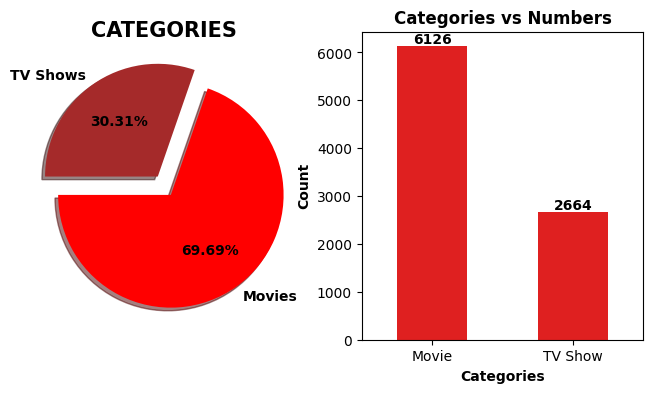

In [ ]:
# General Categorization of ENTERTAINTMENT TYPE


a=df.groupby("type")["show_id"].count()
b=pd.DataFrame(a)
fig = plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.pie(a,labels=["Movies","TV Shows"],autopct='%.2f%%',colors=["red","brown"],explode=[0.1,0.1],radius=1,startangle = 180,shadow =True,textprops = {"fontsize":10,"color":"black","weight":"bold"})
plt.title("CATEGORIES",{"fontsize":15,"color":"black","weight":"bold"})



plt.subplot(1,2,2)
ax=sns.barplot(x='type',y='show_id', data=b,width=0.5,color="r")
ax.bar_label(ax.containers[0],weight="bold")
plt.xlabel("Categories",weight="bold")
plt.ylabel("Count",weight="bold")
ax.set_xticks(["Movie","TV Show"])
plt.title('Categories vs Numbers',weight="bold")

plt.show()

**ANALYSIS:**

The entertaintment data clearly divides the type of media as TV Show and Movies with Movies dominating the streaming platform with 3/4th of the content.

# **CAST**

In [ ]:
#Normalizing CAST column - "cast_df"

cast_df = df[["title","cast"]]
cast_df["cast"]=cast_df["cast"].apply(lambda x: str(x).split(", "))
cast_df=cast_df.explode("cast")
cast_df["cast"].value_counts().head(10)

,count
cast,
No Data,825
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30


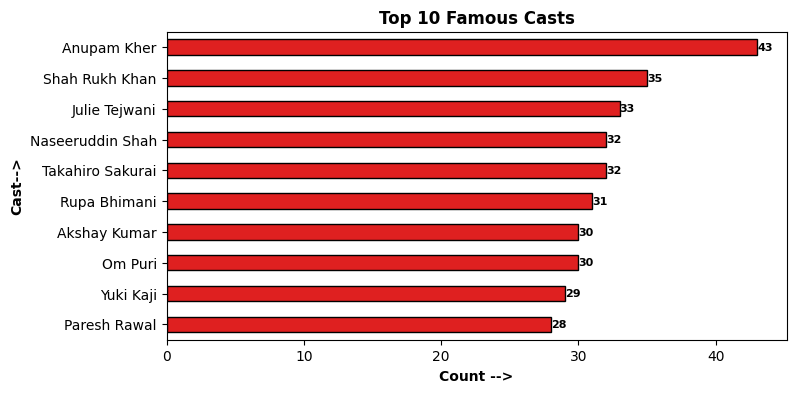

In [ ]:
  # As the Field with "No Data" dominates the rankings,
  # its preferable to delete them and display the actual standings.

cast_df = cast_df[~(cast_df['cast']=='No Data')]

fig = plt.figure(figsize=(8,4))
ax=sns.barplot(x=cast_df.cast.value_counts().head(10),y=cast_df.cast.value_counts().head(10).index,width=0.5,color='r',edgecolor='black',orient="h")
ax.bar_label(ax.containers[0],weight="bold",fontsize=8)
plt.xlabel("Count -->",weight="bold")
plt.ylabel("Cast-->",weight="bold")
plt.title('Top 10 Famous Casts',weight="bold")
plt.xticks(fontsize=10)
plt.show()

**ANALYSIS:**

The entertaintment platform is clearly dominated by the Indian Actors due to mass popularity and streamed content with 6 out of 10 famous casts being from Indian Film Fraternity.

# **Country**

In [ ]:
#Normalizing COUNTRY column - "country_df"

country_df = df[["title","country"]]

country_df["country"]=country_df["country"].apply(lambda x: str(x).split(", "))
country_df=country_df.explode("country")
country_df["country"].value_counts().sort_values(ascending=False).head(10)



,count
country,
United States,3680
India,1046
No Data,829
United Kingdom,803
Canada,445
France,393
Japan,316
Spain,232
South Korea,231


In [ ]:
country_df["country"].nunique() # Unique country values - indicating the viewer base of NETFLIX

128

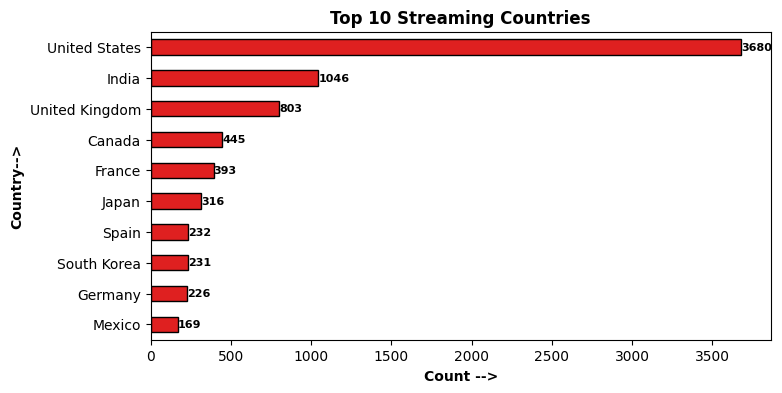

In [ ]:
  # As the Field with "No Data" leads the rankings,
  # its preferable to delete them and display the actual standings.

country_df = country_df[~(country_df['country']=='No Data')]

fig = plt.figure(figsize=(8,4))
ax=sns.barplot(x=country_df.country.value_counts().head(10),y=country_df.country.value_counts().head(10).index,width=0.5,color='r',edgecolor='black',orient="h")
ax.bar_label(ax.containers[0],weight="bold",fontsize=8)
plt.xlabel("Count -->",weight="bold")
plt.ylabel("Country-->",weight="bold")
plt.title('Top 10 Streaming Countries',weight="bold")
plt.xticks(fontsize=10)
plt.show()


**ANALYSIS:**

The country wise segregation of data shows United States leading the race with 3680 shows followed by India and United Kingdom in the 2nd and 3rd place respectively.

This justifies the 6/10 famous casts belonging to Indian Cinema.



In [ ]:
# LEAST SHOWS
country_with_less_than_5_shows_df = country_df["country"].value_counts()
country_with_less_than_5_shows_df = country_with_less_than_5_shows_df[country_with_less_than_5_shows_df < 5]
country_with_less_than_5_shows_df=pd.DataFrame(country_with_less_than_5_shows_df)
country_with_less_than_5_shows_df.reset_index(inplace=True)
country_with_less_than_5_shows_df.columns=["country","count"]
country_with_less_than_5_shows_df

,country,count
0,Croatia,4
1,Iran,4
2,Venezuela,4
3,Bangladesh,4
4,Malta,3
...,...,...
57,Bermuda,1
58,Ecuador,1
59,Armenia,1
60,Mongolia,1


**ANALYSIS:**

This shows 62 countries have less than 5 shows streamed on Netflix.

# **Directors**






In [ ]:
#Normalising Director Column - "director_df"

director_df = df[["title","director"]]
director_df["director"]=director_df["director"].apply(lambda x: str(x).split(", "))
director_df=director_df.explode("director")
director_df["director"].value_counts().sort_values(ascending=False)



,count
director,
No Data,2621
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
...,...
Shawn Crahan,1
Kazumi Fukushima,1
Clarence Yiu-leung Fok,1


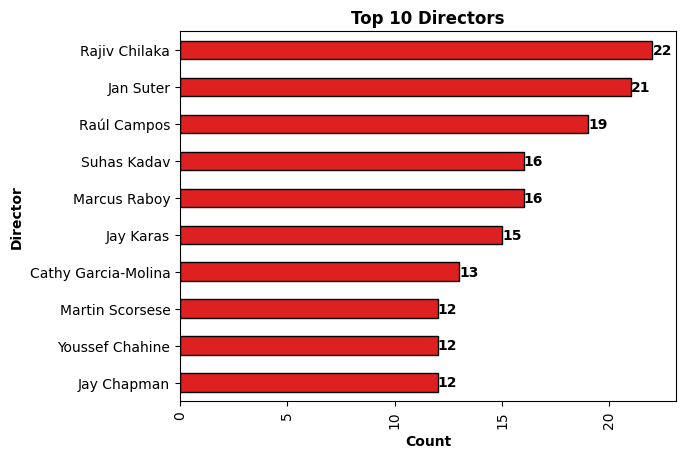

In [ ]:
 # As the Field with "No Data" dominates the rankings,
  # its preferable to delete them and display the actual standings.

director_df = director_df[~(director_df['director']=='No Data')]

ax=sns.barplot(x=director_df.director.value_counts().head(10),y=director_df.director.value_counts().head(10).index,width=0.5,color='r',orient= "h",edgecolor='black')
ax.bar_label(ax.containers[0],weight="bold")
plt.xlabel("Count",weight="bold")
plt.ylabel("Director",weight="bold")
plt.title('Top 10 Directors',weight="bold")
plt.xticks(rotation=90, fontsize=10)
plt.show()

# **Rating**

In [ ]:
# ANALYZING "RATING" Column

rating_df=df[["title","type","rating"]]
movie_df=rating_df[rating_df["type"]=="Movie"]
tv_show_df=rating_df[rating_df["type"]=="TV Show"]


def rating_segment(rating):
  if rating in ("TV-Y","TV-Y7","TV-Y7-FV","G"):
    return "Children"
  elif rating in ("PG","PG-13","TV-PG"):
    return "Teens"
  else:
    return "Adults"

rating_df["category"]=rating_df.apply(lambda x: rating_segment(x["rating"]),axis=1)
movie_df["category"]=movie_df.apply(lambda x: rating_segment(x["rating"]),axis=1)
tv_show_df["category"]=tv_show_df.apply(lambda x: rating_segment(x["rating"]),axis=1)

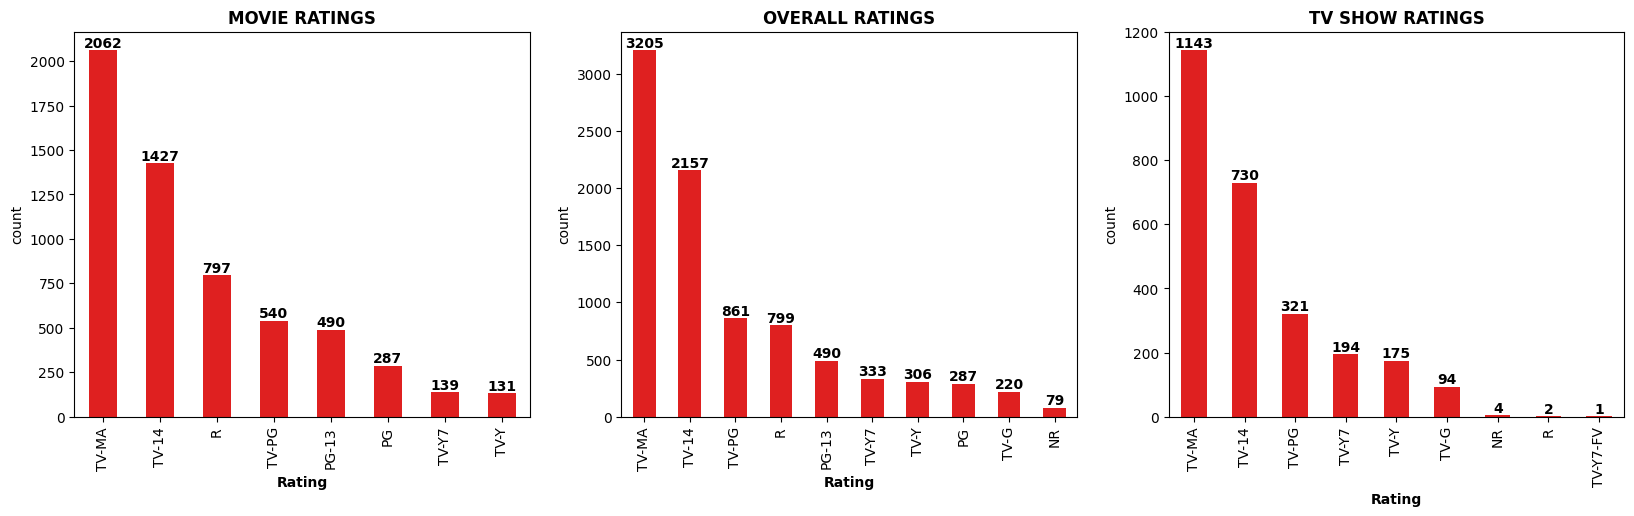

In [ ]:
fig = plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)  # MOVIE RATINGS
ax=sns.barplot(x=movie_df.rating.value_counts().head(8).index,y= movie_df.rating.value_counts().head(8),color="r",width=0.5)
ax.bar_label(ax.containers[0],weight="bold")
plt.xlabel("Rating",weight="bold")
plt.title('MOVIE RATINGS',weight="bold")
plt.xticks(rotation=90)

plt.subplot(1,3,2)
ax=sns.barplot(x=rating_df.rating.value_counts().head(10).index,y= rating_df.rating.value_counts().head(10),color="r",width=0.5)
ax.bar_label(ax.containers[0],weight="bold")
plt.xlabel("Rating",weight="bold")
plt.title('OVERALL RATINGS',weight="bold")
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
ax=sns.barplot(x=tv_show_df.rating.value_counts().head(10).index,y= tv_show_df.rating.value_counts().head(10),color="r",width=0.5)
ax.bar_label(ax.containers[0],weight="bold")
plt.xlabel("Rating",weight="bold")
plt.title('TV SHOW RATINGS',weight="bold")
plt.xticks(rotation=90)

plt.show()

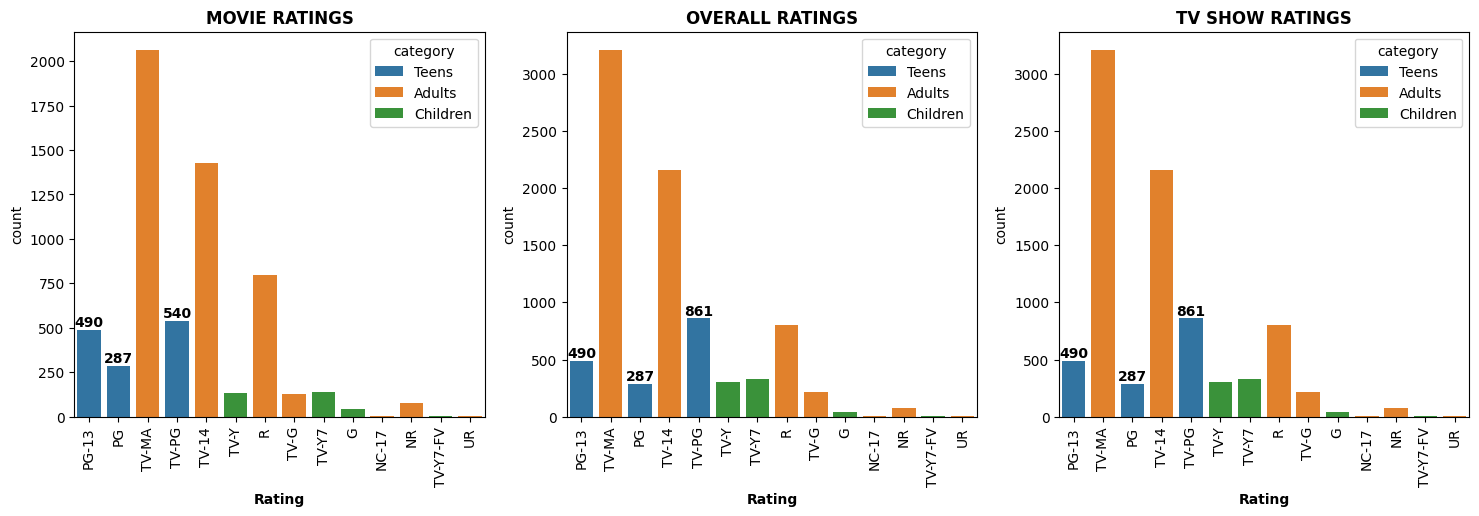

In [ ]:

fig = plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)  # MOVIE RATINGS
ax=sns.countplot(x='rating', hue = 'category',data = movie_df)
ax.bar_label(ax.containers[0],weight="bold")
plt.xlabel("Rating",weight="bold")
plt.title('MOVIE RATINGS',weight="bold")
plt.xticks(rotation=90)

plt.subplot(1,3,2)
ax=sns.countplot(x='rating', hue = 'category',data = rating_df)
ax.bar_label(ax.containers[0],weight="bold")
plt.xlabel("Rating",weight="bold")
plt.title('OVERALL RATINGS',weight="bold")
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
ax=sns.countplot(x='rating', hue = 'category',data = rating_df)
ax.bar_label(ax.containers[0],weight="bold")
plt.xlabel("Rating",weight="bold")
plt.title('TV SHOW RATINGS',weight="bold")
plt.xticks(rotation=90)

plt.show()

**ANALYSIS:**

The ratings represent classifications for content suitability in terms of age groups and content restrictions.

*   Segment Audience = Children----> Ratings-- TV-Y, TV-Y7, TV-Y7-FV, G
*   Segment Audience = Teens-----> Ratings-- PG, PG-13, TV-PG
*   Segment Audience = Adults------> Ratings-- R, TV-14, TV-MA

The graph clearly depicts the dominance of Movie and TV_Shows tailored for Adult Audience Segment followed by Teens and then by Children.






# **GENRE**

In [ ]:
# ANALYZING "LISTED_IN" Column

genre_df=df[["title","type","listed_in"]]

genre_df["listed_in"]=genre_df["listed_in"].apply(lambda x: str(x).split(", "))
genre_df=genre_df.explode("listed_in")
genre_df.groupby("type")["listed_in"].value_counts()

movie_genre_df=genre_df[genre_df["type"]=="Movie"]
tv_show_genre_df=genre_df[genre_df["type"]=="TV Show"]


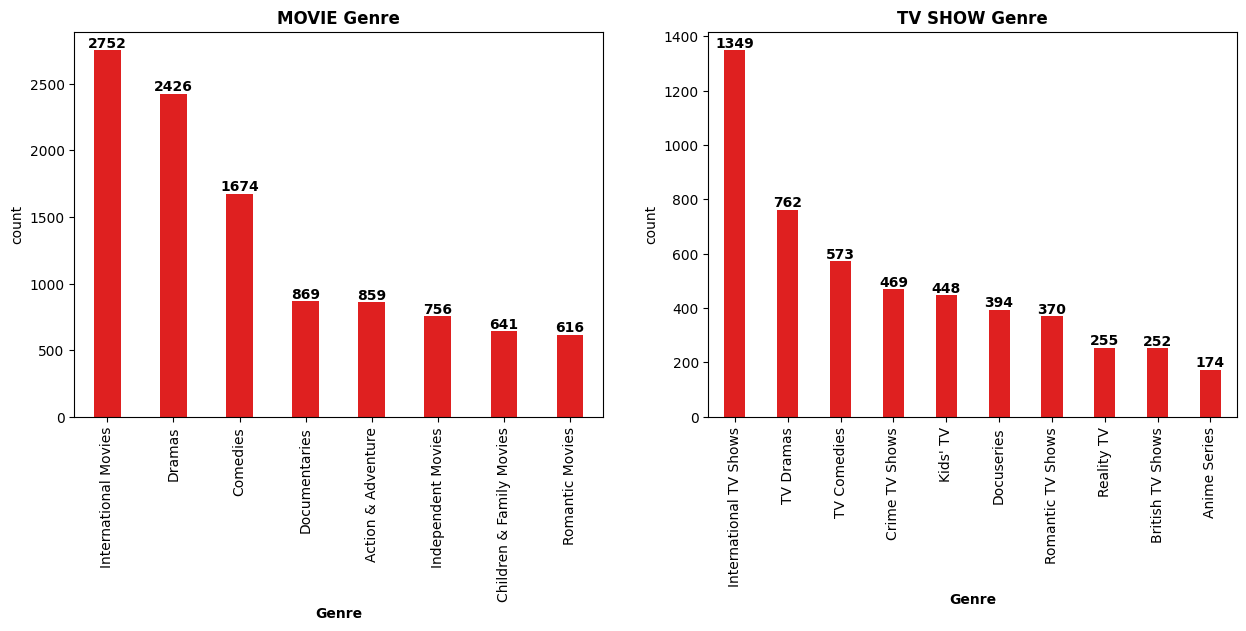

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)  # MOVIE RATINGS
ax=sns.barplot(x=movie_genre_df.listed_in.value_counts().head(8).index,y= movie_genre_df.listed_in.value_counts().head(8),color="r",width=0.4)
ax.bar_label(ax.containers[0],weight="bold")
plt.xlabel("Genre",weight="bold")
plt.title('MOVIE Genre',weight="bold")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
ax=sns.barplot(x=tv_show_genre_df.listed_in.value_counts().head(10).index,y= tv_show_genre_df.listed_in.value_counts().head(10),color="r",width=0.4)
ax.bar_label(ax.containers[0],weight="bold")
plt.xlabel("Genre",weight="bold")
plt.title('TV SHOW Genre',weight="bold")
plt.xticks(rotation=90)

plt.show()

**ANALYSIS:**

The analysis of Genre depicts 2 different scenarios- one for TV shows and one for Movies.

For Movies, the "International Movies" category dominates the leaderbaord with "Dramas" followed by "Comedies" and then "Documentaries".

For TV Shows, the first three in the race is shared by the same genres as in Movies but for TV Shows, Crime TV Shows leads the race between Docuseries.

# **DATE ADDED on NETFLIX**

**ADDED YEAR**

In [ ]:
# ANALYSIS of ADDED_DATE COLUMN

tv_yr=df[df["type"]=="TV Show"]["added_year"].value_counts()
tv_yr_df=tv_yr.to_frame()


movie_yr=df[df["type"]=="Movie"]["added_year"].value_counts()
movie_yr_df=movie_yr.to_frame()

tv_yr_df.columns=["TV Shows"]
movie_yr_df.columns=["Movies"]

tv_yr_df.reset_index(inplace=True)
movie_yr_df.reset_index(inplace=True)


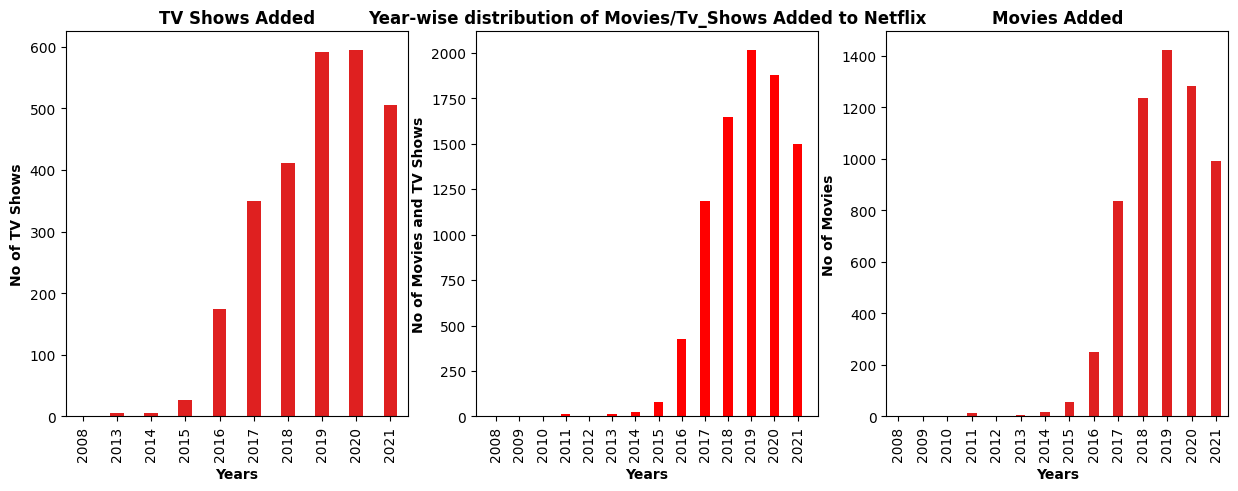

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
ax=sns.barplot(x="added_year",y="TV Shows",data=tv_yr_df,color='r',width = 0.4)
plt.xlabel("Years",weight="bold")
plt.ylabel("No of TV Shows",weight="bold")
plt.title("TV Shows Added",weight="bold")
plt.xticks(rotation=90,fontsize=10)

plt.subplot(1,3,2)
x_bar=df["added_year"].value_counts().index
y_bar=df["added_year"].value_counts().values
plt.bar(x_bar,y_bar,color="r",width = 0.4)
plt.xticks(ticks=x_bar,rotation=90, fontsize=10)
plt.xlabel("Years",weight="bold")
plt.ylabel("No of Movies and TV Shows",weight="bold")
plt.title("Year-wise distribution of Movies/Tv_Shows Added to Netflix",weight="bold")

plt.subplot(1,3,3)
sns.barplot(x="added_year",y="Movies",data=movie_yr_df,color='r',width = 0.4)
plt.xlabel("Years",weight="bold")
plt.ylabel("No of Movies",weight="bold")
plt.title("Movies Added",weight="bold")
plt.xticks(rotation=90,fontsize=10)
plt.show()

**ANALYSIS:**

The column clearly depicts the sudden spike of content from 2018 to 2020.

This behaviour is same for both TV Shows and Movies.
While 1200 TV_Shows were added, 2600 Movies  were added during the same period.

This clearly points to the Increasing Popularity of NETFLIX around the world.



**ADDED MONTH**

In [ ]:
# ANALYSIS of MONTH_DATE COLUMN

tv_mo=df[df["type"]=="TV Show"]["added_month"].value_counts()
tv_mo_df=tv_mo.to_frame()


movie_mo=df[df["type"]=="Movie"]["added_month"].value_counts()
movie_mo_df=movie_mo.to_frame()

tv_mo_df.columns=["TV Shows"]
movie_mo_df.columns=["Movies"]

tv_mo_df.reset_index(inplace=True)
movie_mo_df.reset_index(inplace=True)

def month_name(added_month):
  if added_month==1:
    return "January"
  elif added_month==2:
    return "February"
  elif added_month==3:
    return "March"
  elif added_month==4:
    return "April"
  elif added_month==5:
    return "May"
  elif added_month==6:
    return "June"
  elif added_month==7:
    return "July"
  elif added_month==8:
    return "August"
  elif added_month==9:
    return "September"
  elif added_month==10:
    return "October"
  elif added_month==11:
    return "November"
  else:
    return "December"



movie_mo_df["month_name"]=movie_mo_df.apply(lambda x: month_name(x["added_month"]),axis=1)
tv_mo_df["month_name"]=tv_mo_df.apply(lambda x: month_name(x["added_month"]),axis=1)


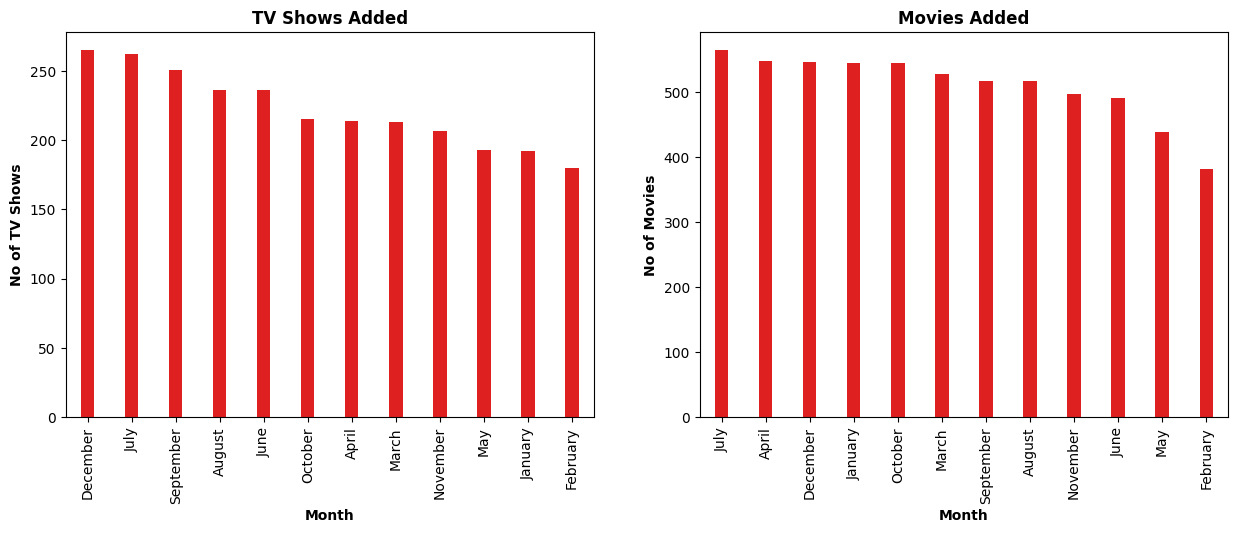

In [ ]:
plt.figure(figsize=(15 , 5))
plt.subplot(1,2,1)
ax=sns.barplot(x="month_name",y="TV Shows",data=tv_mo_df,color='r',width=0.3)
plt.xlabel("Month",weight="bold")
plt.ylabel("No of TV Shows",weight="bold")
plt.title("TV Shows Added",weight="bold")
plt.xticks(rotation=90,fontsize=10)

plt.subplot(1,2,2)
sns.barplot(x="month_name",y="Movies",data=movie_mo_df,color='r',width=0.3)
plt.xlabel("Month",weight="bold")
plt.ylabel("No of Movies",weight="bold")
plt.title("Movies Added",weight="bold")
plt.xticks(rotation=90,fontsize=10)
plt.show()

**ANALYSIS:**

The graphs clearly represents 2 different scenarios, each for each type of content.

For TV Shows, the maximum movies were added during December followed by July and September.

Whereas, for Movies - it is July followed by April and December.


This points out to a unique and important behaviour between the 2 types:

1.   July and December have turned out as common months in top 3 months where the content added is maximum.
2.   February turns out to be the month where least number of shows were added on the platform.






**ADDED DAY**

In [ ]:
# ANALYSIS of DAY_DATE COLUMN

tv_day=df[df["type"]=="TV Show"]["added_day"].value_counts()
tv_day_df=tv_day.to_frame()


movie_day=df[df["type"]=="Movie"]["added_day"].value_counts()
movie_day_df=movie_day.to_frame()

tv_day_df.columns=["TV Shows"]
movie_day_df.columns=["Movies"]

tv_day_df.reset_index(inplace=True)
movie_day_df.reset_index(inplace=True)

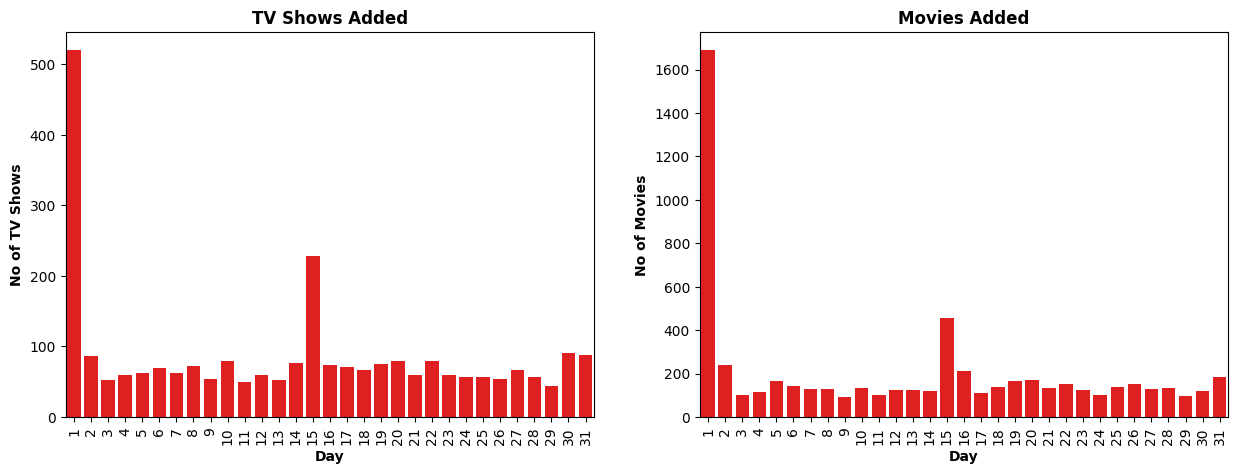

In [ ]:
plt.figure(figsize=(15 , 5))
plt.subplot(1,2,1)
ax=sns.barplot(x="added_day",y="TV Shows",data=tv_day_df,color='r')
plt.xlabel("Day",weight="bold")
plt.ylabel("No of TV Shows",weight="bold")
plt.title("TV Shows Added",weight="bold")
plt.xticks(rotation=90,fontsize=10)

plt.subplot(1,2,2)
sns.barplot(x="added_day",y="Movies",data=movie_day_df,color='r')
plt.xlabel("Day",weight="bold")
plt.ylabel("No of Movies",weight="bold")
plt.title("Movies Added",weight="bold")
plt.xticks(rotation=90,fontsize=10)
plt.show()

**ANALYSIS:**

The graphs imply a well stated information about the day of release for both Movies and TV Shows.

1st and 15th of the Month turn out to be the day where maximum content is added in comparision to other days of the month.

we can conclude that, 1st and 15th July, 1st and 15th December turn out to be the 2 days when maximum content is added.

# **RELEASE YEAR**

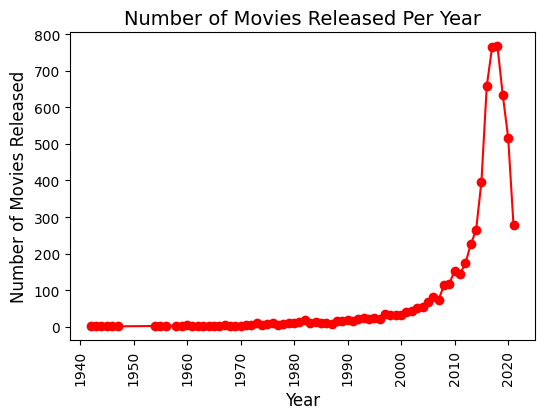

In [ ]:
df_movies = df[df['type'] == 'Movie']
movies_per_year = df_movies.groupby('release_year').size()

plt.figure(figsize=(6, 4))
movies_per_year.plot(kind='line', marker='o', color='red')
plt.title('Number of Movies Released Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies Released', fontsize=12)
plt.xticks(rotation=90)



plt.show()

# **DURATION**

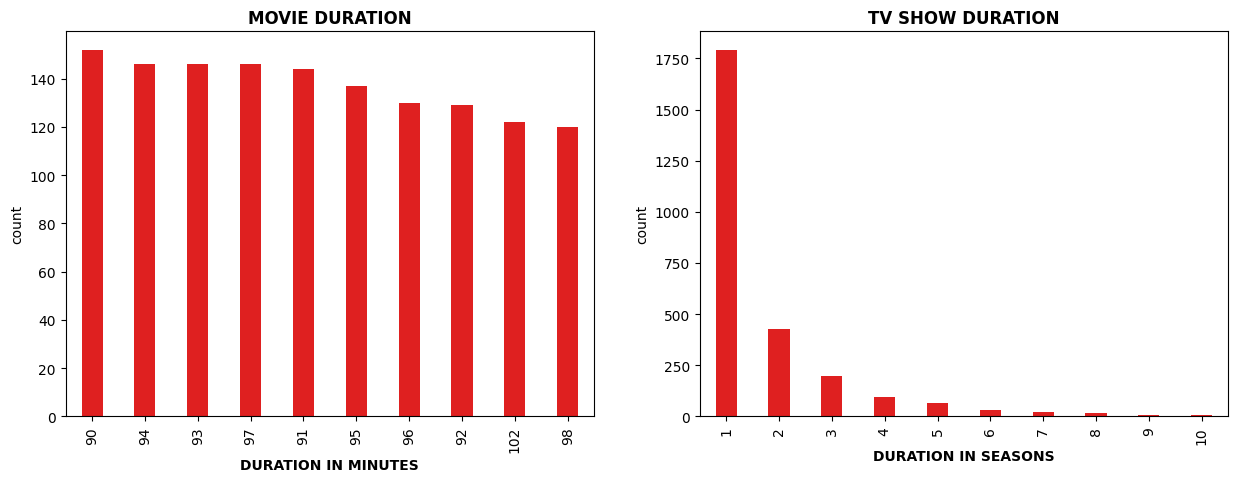

In [ ]:
# ANALYSIS OF DURATION COLUMN

df["duration"]=df["duration"].apply(lambda x: str(x).split(" "))
df["duration"]=df["duration"].apply(lambda x: x[0])
df.groupby("type")["duration"].value_counts()

movie_duration_df=df[df["type"]=="Movie"]
tv_show_duration_df=df[df["type"]=="TV Show"]

fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=movie_duration_df.duration.value_counts().head(10).index,y= movie_duration_df.duration.value_counts().head(10),color="r",width=0.4)
plt.xlabel("DURATION IN MINUTES",weight="bold")
plt.title('MOVIE DURATION',weight="bold")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=tv_show_duration_df.duration.value_counts().head(10).index,y= tv_show_duration_df.duration.value_counts().head(10),color="r",width=0.4)
plt.xlabel("DURATION IN SEASONS",weight="bold")
plt.title('TV SHOW DURATION',weight="bold")
plt.xticks(rotation=90)
plt.show()

**ANALYSIS:**

The Duration analysis indicates that most of the movies adhere to the time limit of 90 Minutes whereas 90% of the TV Shows have a duration of 1 Season only.



# **Relation-ships**

**CAST ~ DIRECTOR RELATIONSHIP**

In [ ]:
cast_director_df=pd.merge(left=director_df,right=cast_df,on="title")
cast_director_df.groupby("director")["cast"].value_counts().sort_values(ascending=False)
cast_director_df.groupby(["director","cast"])["cast"].value_counts().sort_values(ascending=False).head(25)


director           cast              
Rajiv Chilaka      Julie Tejwani         19
                   Rajesh Kava           19
                   Rupa Bhimani          18
                   Jigna Bhardwaj        18
                   Vatsal Dubey          16
                   Swapnil               13
                   Mousam                13
Suhas Kadav        Saurav Chakraborty     8
Toshiya Shinohara  Satsuki Yukino         7
S.S. Rajamouli     Anushka Shetty         7
                   Nassar                 7
                   Prabhas                7
                   Ramya Krishnan         7
                   Rana Daggubati         7
                   Sathyaraj              7
                   Tamannaah Bhatia       7
Yılmaz Erdoğan     Yılmaz Erdoğan         7
Toshiya Shinohara  Kappei Yamaguchi       7
                   Koji Tsujitani         7
                   Kumiko Watanabe        7
                   Houko Kuwashima        7
Hakan Algül        Ata Demirer            6
Omoni Oboli        Omoni Oboli            6
Joey So            Joseph May             6
David Dhawan       Anupam Kher            6
Name: count, dtype: int64

**ANALYSIS:**

The Director-Cast relation indicates no definite pattern, It varies with popularity of Movie sequel "Chota Bheem" as in case of Director Rajiv Chilaka, and poularity of Suhas Kadav-Saurav Chakraborty duo in case of "Motu Patlu" Movie series.

**GENRE ~ DIRECTOR RELATIONSHIP**

In [ ]:
genre_director_df=pd.merge(left=director_df,right=genre_df,on="title")
genre_director_df.groupby("director")["listed_in"].value_counts().sort_values(ascending=False)
genre_director_df.groupby(["type","director","listed_in"])["listed_in"].value_counts().sort_values(ascending=False).head(25)

md_genre_df=genre_director_df[genre_director_df["type"]=="Movie"]
td_genre_df=genre_director_df[genre_director_df["type"]=="TV Show"]

print("-------------------------------------")
print("GENRE-DIRECTOR RELATION for MOVIE :")
print("-------------------------------------")
print(md_genre_df.groupby(["director","listed_in"])["listed_in"].value_counts().sort_values(ascending=False).head(10))

print("-------------------------------------")
print("GENRE-DIRECTOR RELATION for TV SHOW :")
print("-------------------------------------")
print(td_genre_df.groupby(["director","listed_in"])["listed_in"].value_counts().sort_values(ascending=False).head(10))

-------------------------------------
GENRE-DIRECTOR RELATION for MOVIE :
-------------------------------------
director             listed_in               
Rajiv Chilaka        Children & Family Movies    22
Jan Suter            Stand-Up Comedy             21
Raúl Campos          Stand-Up Comedy             19
Suhas Kadav          Children & Family Movies    16
Marcus Raboy         Stand-Up Comedy             15
Jay Karas            Stand-Up Comedy             14
Cathy Garcia-Molina  International Movies        13
Jay Chapman          Stand-Up Comedy             12
Youssef Chahine      Dramas                      12
                     International Movies        10
Name: count, dtype: int64
-------------------------------------
GENRE-DIRECTOR RELATION for TV SHOW :
-------------------------------------
director             listed_in                   
Alastair Fothergill  International TV Shows          3
                     Docuseries                      3
                     B

**ANALYSIS:**

While Director Rajiv Chilaka leads the Movie section with 22 Children and Family shows listed in his name,
Director Alastair Fothergill leads the TV Shows section with 10 shows in different genres - International, Docuseries and British TV Show.


**CAST ~ GENRE**

In [ ]:
genre_cast_df=pd.merge(left=cast_df,right=genre_df,on="title")
genre_cast_df.groupby("cast")["listed_in"].value_counts().sort_values(ascending=False)
genre_cast_df.groupby(["type","cast","listed_in"])["listed_in"].value_counts().sort_values(ascending=False).head(25)

mc_genre_df=genre_cast_df[genre_cast_df["type"]=="Movie"]
tc_genre_df=genre_cast_df[genre_cast_df["type"]=="TV Show"]

print("-------------------------------------")
print("GENRE-CAST RELATION for MOVIE :")
print("-------------------------------------")
print(mc_genre_df.groupby(["cast","listed_in"])["listed_in"].value_counts().sort_values(ascending=False).head(10))

print("-------------------------------------")
print("GENRE-CAST RELATION for TV SHOW :")
print("-------------------------------------")
print(tc_genre_df.groupby(["cast","listed_in"])["listed_in"].value_counts().sort_values(ascending=False).head(10))

-------------------------------------
GENRE-CAST RELATION for MOVIE :
-------------------------------------
cast              listed_in               
Anupam Kher       International Movies        38
Shah Rukh Khan    International Movies        32
Naseeruddin Shah  Dramas                      28
Shah Rukh Khan    Dramas                      28
Anupam Kher       Dramas                      28
Akshay Kumar      International Movies        27
Om Puri           International Movies        27
Naseeruddin Shah  International Movies        27
Julie Tejwani     Children & Family Movies    26
Paresh Rawal      International Movies        25
Name: count, dtype: int64
-------------------------------------
GENRE-CAST RELATION for TV SHOW :
-------------------------------------
cast              listed_in             
Takahiro Sakurai  Anime Series              24
                  International TV Shows    22
Yuki Kaji         Anime Series              18
                  International TV Shows 

**ANALYSIS:**

The genre-cast relation reveals the dominance of International Movies and Drama Actors in Movie Genre.

Whereas, the relation signifies the dominance of Anime Series in TV_Shows.

# **SUMMARY**

 Netflix platform has focussed mainly on 2 broad categories - TV Shows and Movies, with Movies leading the race with maximum and diversified content.Diving deep into the data summarizes the dataset to infer the following:

*   Country -
Viewer base of Netflix spans accross 128 countries i.e. 65% which is quite impressive. But there are 62 countries where the number of shows streamed is less than 5.

*   Released Year and Date Added Year -
There seems to be a sudden spike in the date_added_on_Netflix w.r.t released year, owing to popularity of the platform mainly during 2018-2020 range.
  
  The Date_added has an eye-catching trend - with 1st and 15th of July and December, leading with maximum number of shows added.

  This implies that movies are added in the year-mid and year-end,which tends to be holiday season for the US viewer base - implying a little biasness.

*   Duration of Movies and TV_shows:
The Movies have followed a general trend of adhering to the 90 minute streaming length for most of them.

  Where as few of the TV_shows have even streamed for 10 seasons, whereas majority of them have spanned for not more than 1 season


*   Genre -
There has been an uneven distribution in the addition of different genres. While International Movies, TV Shows and Dramas have an uneven advantage in the diversification, Genres like Docuseries, Documentaries, Anime have somewhat lesser popularity.

*   Cast -
The Cast data is region specific owing to the popularity of Shows and movies in specific region.

*   Director-
Director data is category specific in proprtionate to the famous Genre across the world i.e. the International Movies and TV Shows, which are at the pyramid top in respective categories. Though the famous Director among Movies is bagged by Rajiv - who mainly directs Children & Family Movies.

   









# **RECCOMENDATIONS**

Based on the summary, few reccomendations can be tailored to increase the business standing in global market.

*   Increasing Viewer Base
Though 65% of world countries have Netflix users, the 62 countries where streaming rate is less than 5 shows can be targetted and the streaming rate can be gradually increased.

*   Genre Distribution
Less popular genres like Anime, Docuseries, Reality shows can be focused more on with quality and quantity so that these also gain a commendable audience.

*   Rating based Shows and movies
There has been an uneven distribution of shows based on ratings with maximum audience base as Adults. The other audience base i.e. children and teen can also be focussed by giving chance to Independent Directors for short movies on experimental basis and check for their popularity in the long run.

*   Addition of shows
This feature has shown a little bias towards US viewer base owing to its market share, instead, the addition rate can be increased to 3 months instead of present 6 months to increase popularity and attract market.

*   Collaboration with Directors and Cast
Efficient collaboration with popular directors and cast to produce movies streamed exclusively on the platform can be a better way to increase the business.
  Equally, new talents in Directioning and casting can be given preference, which can turn the platform as a Start-up base and attract new faces.

*   Diversified Local content
Can be the one of the best means to attract more viewers. The local content can be made global by incorporating AI based technology to suggest inter-cultural, inter-regional content.










# **CONCLUSION**

Netflix has not only transformed the entertainment industry but has also set a benchmark for subscription-based services. Its ability to continuously adapt to market dynamics and innovate in content, technology, and business strategy will be critical in maintaining its position as a dominant player in the global entertainment space.
Netflix has built a unique corporate culture that prioritizes creativity, autonomy, and innovation. This culture has helped the company attract top talent, drive bold business decisions, and maintain a competitive edge in the fast-evolving tech and entertainment sectors.